## <b>Objective - Improve user experience by analysing sales data and Increase revenue</b>

In [241]:
#importing python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [242]:
#importing the dataset

dsd = pd.read_csv(r'C:\Users\dream\OneDrive\Desktop\NooB 1.0 Bootcamp\Python\Python_Class_6_Dataset\Diwali Sales Data.csv', encoding= 'unicode_escape')

In [243]:
#DATA CLEANING
#understanding the data size

dsd.shape

(11251, 14)

In [244]:
#understanding the data

dsd.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,Unnamed
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [245]:
#checking for null values

dsd.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
Unnamed             11251
dtype: int64

In [246]:
#deleting the columns that are completely null

dsd.drop(['Status', 'Unnamed'], axis = 1, inplace = True)

In [247]:
dsd.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [248]:
#checking on the data with null valued rows

print(dsd[dsd.isnull().any(axis=1)])

     User_ID Cust_name Product_ID Gender  Age  Marital_Status           State  \
7    1002092  Shivangi  P00273442      F   61               0     Maharashtra   
14   1003858      Cano  P00293742      M   46               1  Madhya Pradesh   
16   1005447       Amy  P00275642      F   48               1  Andhra Pradesh   
109  1005265    Sakshi  P00296242      F   48               1           Delhi   
111  1005261   Apoorva  P00057942      F   41               1           Delhi   
184  1005538    Kartik  P00269542      F   49               1       Karnataka   
293  1000326  Jonathan  P00120542      M   53               0         Gujarat   
344  1002507   Lakshmi  P00045842      F   35               1         Gujarat   
345  1004498   Srishti  P00030842      F   55               0           Delhi   
452  1004601    Gaurav  P00014442      F   40               1  Madhya Pradesh   
464  1004528    Anurag  P00338442      F   33               1   Uttar Pradesh   
493  1002994    Hemant   P00

In [249]:
#Since amount is important for Sales analysis, filling the null values with the mean amount value of respective product category.

dsd['Amount'] = dsd.groupby('Product_Category')['Amount'].transform(lambda x: x.fillna(x.mean()))

In [250]:
#Confirming that the values got filled and no remaining null rows

print(dsd[dsd.isnull().any(axis=1)])

print(dsd[(dsd['User_ID'] == 1002092) & (dsd['Product_ID'] == 'P00273442')])

Empty DataFrame
Columns: [User_ID, Cust_name, Product_ID, Gender, Age, Marital_Status, State, Zone, Occupation, Product_Category, Orders, Amount]
Index: []
   User_ID Cust_name Product_ID Gender  Age  Marital_Status        State  \
7  1002092  Shivangi  P00273442      F   61               0  Maharashtra   

      Zone Occupation Product_Category  Orders        Amount  
7  Western  IT Sector             Auto       1  20191.855567  


In [251]:
#Since amount has 6 digit floating value, for calculation lets make it as integer.

dsd['Amount'] = dsd['Amount'].astype('int')

In [252]:
dsd['Amount'].dtypes

dtype('int32')

In [253]:
dsd.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [254]:
#changing the column name example 

dsd.rename(columns = {'Marital_Status' : 'Married'}, inplace = True)
dsd.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Married',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [67]:
#Describe function gives the statistical analysis on columns that contain numerical values in dataset. 
#We can also select the columns on which we want this analysis.

dsd[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9460.454626
std,12.754122,1.115047,5224.434220
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8110.000000
75%,43.000000,3.000000,12691.500000
max,92.000000,4.000000,23952.000000


In [255]:
#DATA TRANSFORMATION
#Age column is ranging widely. For ease of analysis, categorizing the Age column to Age_Group

def age_categor(age):
    if age < 18:
        return '0-17'
    elif age < 26:
        return '18-25'
    elif age < 36:
        return '26-35'
    elif age < 46:
        return '36-45'
    elif age < 55:
        return '46-54'
    else:
        return '55+'

dsd['Age_Group'] = dsd['Age'].apply(age_categories)

In [256]:
dsd

,User_ID,Cust_name,Product_ID,Gender,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount,Age_Group
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952,26-35
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,26-35
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924,26-35
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912,0-17
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,1,Maharashtra,Western,Chemical,Office,4,370,18-25
11247,1004089,Reichenbach,P00171342,M,33,0,Haryana,Northern,Healthcare,Veterinary,3,367,26-35
11248,1001209,Oshin,P00201342,F,40,0,Madhya Pradesh,Central,Textile,Office,4,213,36-45
11249,1004023,Noonan,P00059442,M,37,0,Karnataka,Southern,Agriculture,Office,3,206,36-45


In [257]:
#Checking for duplicate values if any. 

print('Duplicate Rows: ', dsd[dsd.duplicated(keep= False)])

Duplicate Rows:         User_ID   Cust_name Product_ID Gender  Age  Married          State  \
18     1001883     Praneet  P00029842      M   54        1  Uttar Pradesh   
19     1001883     Praneet  P00029842      M   54        1  Uttar Pradesh   
4403   1004725     Jackson  P00150842      F   37        1    Maharashtra   
4404   1004725     Jackson  P00150842      F   37        1    Maharashtra   
5702   1003208      Bowman  P00171642      F   31        0          Bihar   
5703   1003208      Bowman  P00171642      F   31        0          Bihar   
5907   1001260     Dheeraj  P00344042      M   28        0    Maharashtra   
5908   1001260     Dheeraj  P00344042      M   28        0    Maharashtra   
6172   1001325       Reese  P00111742      F   27        1        Gujarat   
6173   1001325       Reese  P00111742      F   27        1        Gujarat   
8650   1000083        Gute  P00242842      M   35        0  Uttar Pradesh   
8651   1000083        Gute  P00242842      M   35        0 

In [258]:
#Delete them incase duplicates found.

dsd.drop_duplicates(inplace = True)
dsd

,User_ID,Cust_name,Product_ID,Gender,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount,Age_Group
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952,26-35
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,26-35
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924,26-35
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912,0-17
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,1,Maharashtra,Western,Chemical,Office,4,370,18-25
11247,1004089,Reichenbach,P00171342,M,33,0,Haryana,Northern,Healthcare,Veterinary,3,367,26-35
11248,1001209,Oshin,P00201342,F,40,0,Madhya Pradesh,Central,Textile,Office,4,213,36-45
11249,1004023,Noonan,P00059442,M,37,0,Karnataka,Southern,Agriculture,Office,3,206,36-45


,User_ID,Cust_name,Product_ID,Gender,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount,Age_Group
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952,26-35
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,26-35
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924,26-35
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912,0-17
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,1,Maharashtra,Western,Chemical,Office,4,370,18-25
11247,1004089,Reichenbach,P00171342,M,33,0,Haryana,Northern,Healthcare,Veterinary,3,367,26-35
11248,1001209,Oshin,P00201342,F,40,0,Madhya Pradesh,Central,Textile,Office,4,213,36-45
11249,1004023,Noonan,P00059442,M,37,0,Karnataka,Southern,Agriculture,Office,3,206,36-45


<b> EDA - Exploratory Data Analysis</b>

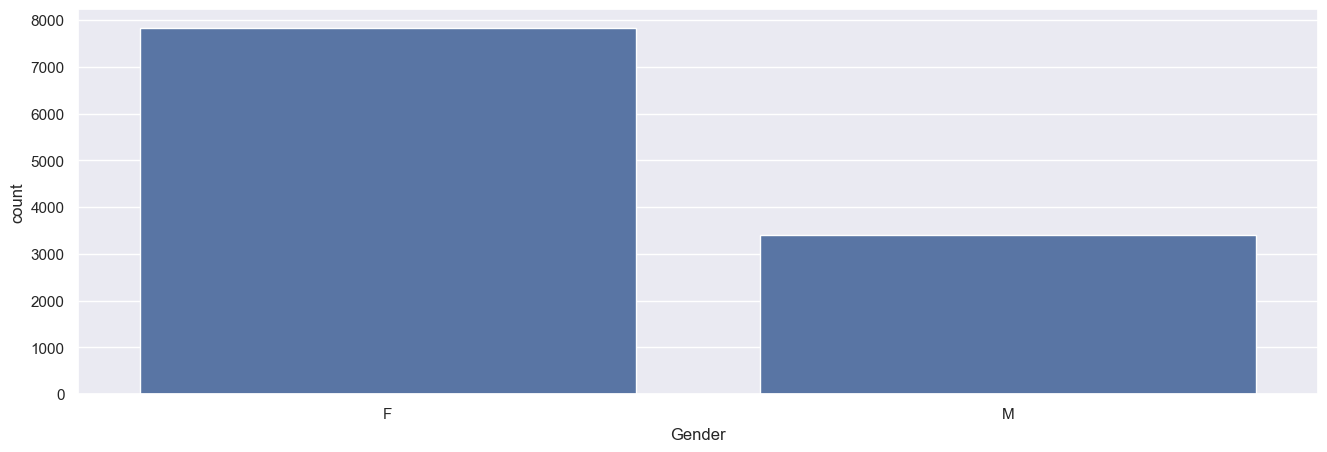

In [218]:
#Taking Gender as the first column for checking the impact

gender = sbn.countplot(data = dsd, x = 'Gender') 

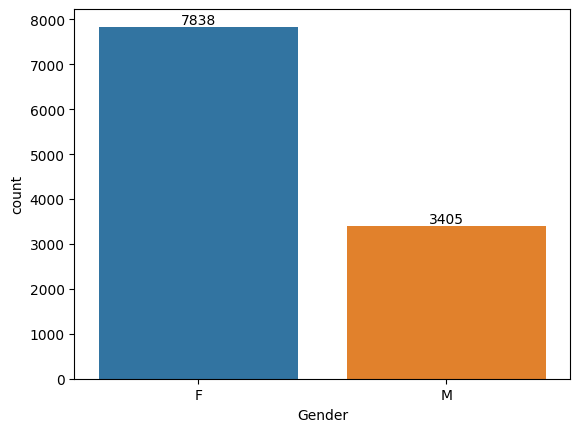

In [133]:
#Customizing the graph by putting the counts on top

gender = sbn.countplot(data = dsd, x = 'Gender', hue = 'Gender') #palette = 'dark:y' -> code to change the colour
for i in gender.containers:
    gender.bar_label(i)

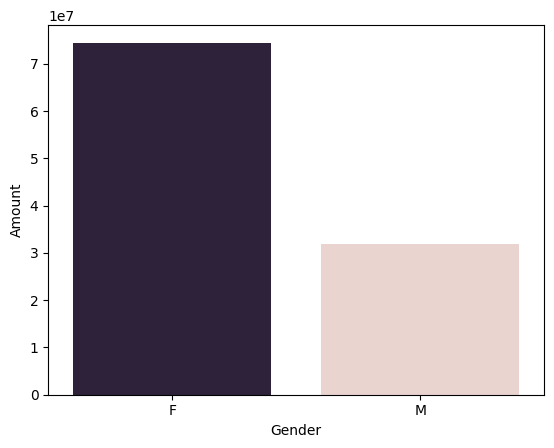

In [162]:
#Comparison of gender and total amount of sales

sales_gender = dsd.groupby('Gender', as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sf_plot = sbn.barplot(sales_gender, x = 'Gender', y = 'Amount', hue = 'Amount', legend = False)

<i>From the analysis of Gender column, we can draw conclusion that Females are top buyers and have more purchasing power than Males.</i>

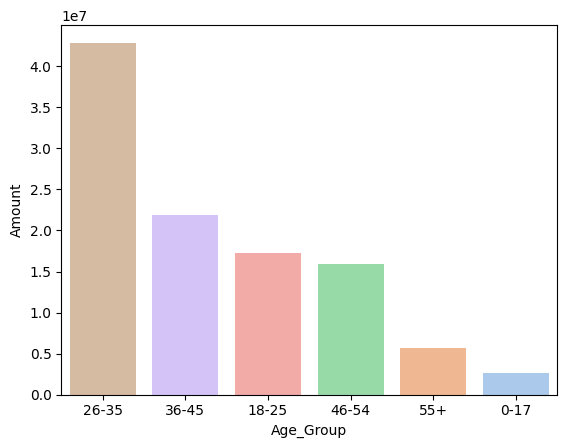

In [183]:
#Second column for the analysis can be Age or Age_group(since we have created categories for easy analysis).
#Comparing the Age and Amount for checking the purchasing power.

age_amount = dsd.groupby(['Age_Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False) 
age_amount_plot = sbn.barplot(age_amount, x = 'Age_Group', y = 'Amount', hue = 'Amount', palette = 'pastel', legend = False)

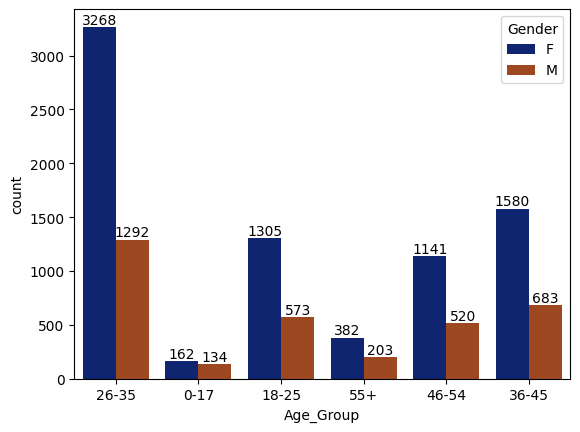

In [184]:
#Comparing the Age_group and Gender for the conclusion

gen_age = sbn.countplot(dsd, x = 'Age_Group', hue = 'Gender', palette = 'dark')
for i in gen_age.containers:
    gen_age.bar_label(i)

<i>From the above analyis on Age_group column, we can draw a conclusion that Females aged between 26-35 contributing most to the revenue.</i>

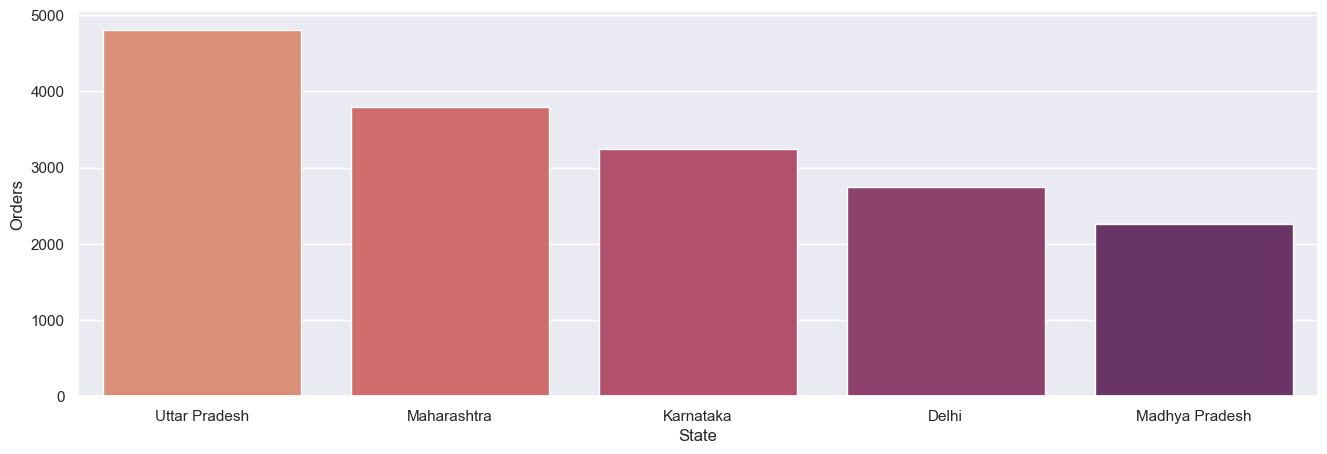

In [217]:
#Next column for analysis can be State. (As we can check which region is contributing the most and least)

#Comparing the State vs order count. Since there are multiple states, we can select top 5 or 10 states using head function.

state_order = dsd.groupby('State', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending = False).head(5)
#sbn.set(rc = {'figure.figsize' : (16,5)}) -- to change the size of figure
state_order_plot = sbn.barplot(state_order, x = 'State', y = 'Orders', hue = 'State', palette = 'flare')

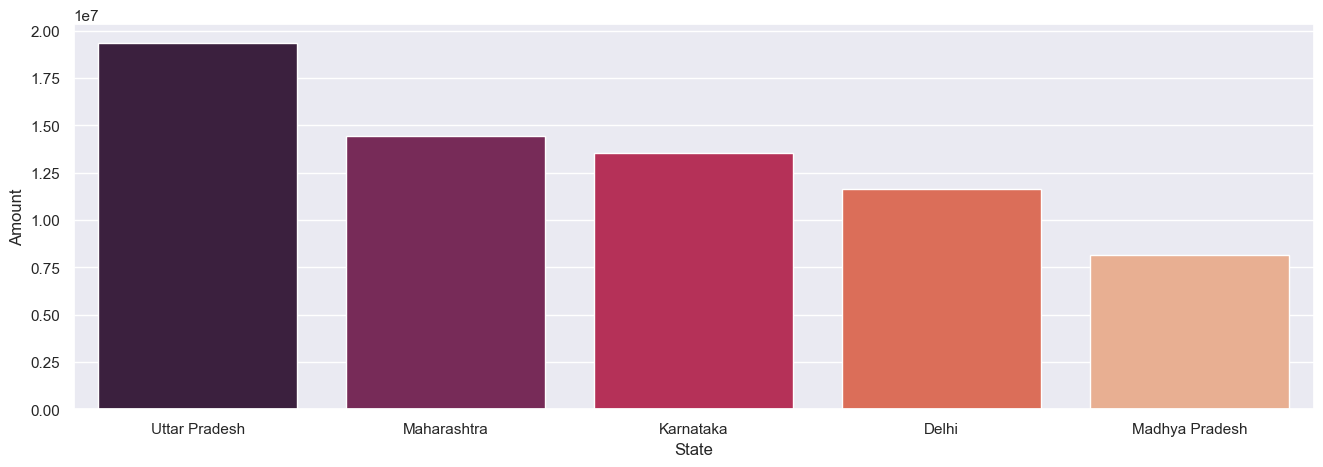

In [215]:
#As most number of orders from the above states we can make comparision of state with Amount.

state_amount = dsd.groupby('State', as_index= False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(5)
state_amount_plot = sbn.barplot(state_amount, x='State', y='Amount', hue='State', palette = 'rocket')

<i>From the above analysis of State and Orders columns, we can draw a conclusion that the top 3 buyer states are Uttar Pradesh, Maharashtra and Karnataka.</i>

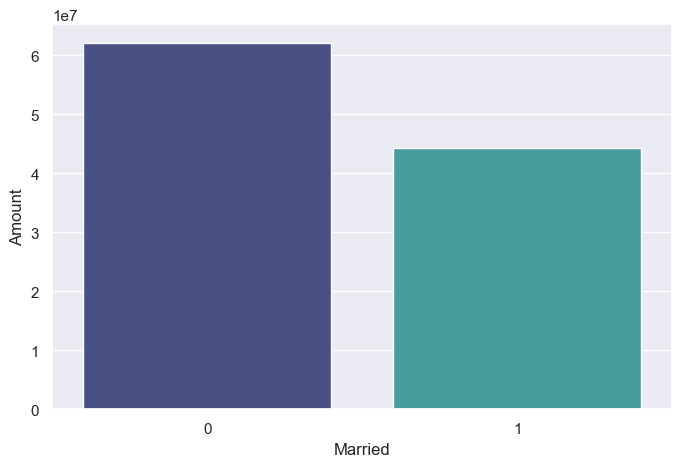

In [268]:
#Checking if Marital_Status column is making any impact on the revenue.

marr_rev = dsd.groupby('Married', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending= False)
sbn.set(rc={'figure.figsize': (8,5)})
marr_rev_plot = sbn.barplot(marr_rev, x= 'Married', y='Amount', hue= 'Married', palette= 'mako', legend = False)

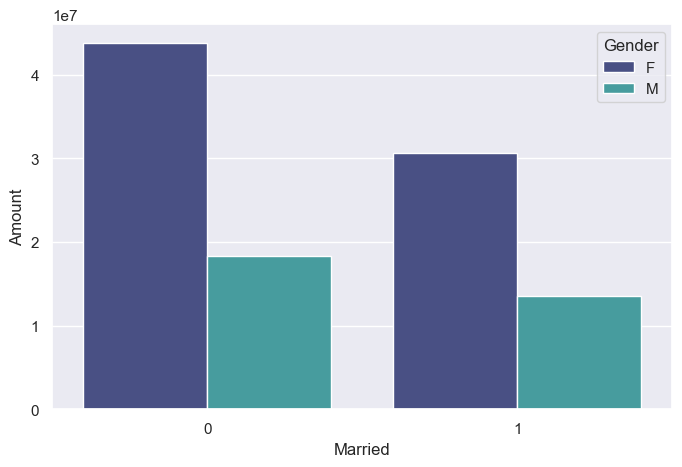

In [275]:
#Comparing marital status with gender

marr_gen = dsd.groupby(['Married','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending= False)
sbn.set(rc={'figure.figsize': (8,5)})
marr_gen_plot = sbn.barplot(marr_gen, x= 'Married', y='Amount', hue= 'Gender', palette= 'mako', legend = 'full')

<i>From the analysis on Marital Status column, we can draw a conclusion that unmarried women are the top buyers.</i>

In [276]:
dsd.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Married',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_Group'],
      dtype='object')

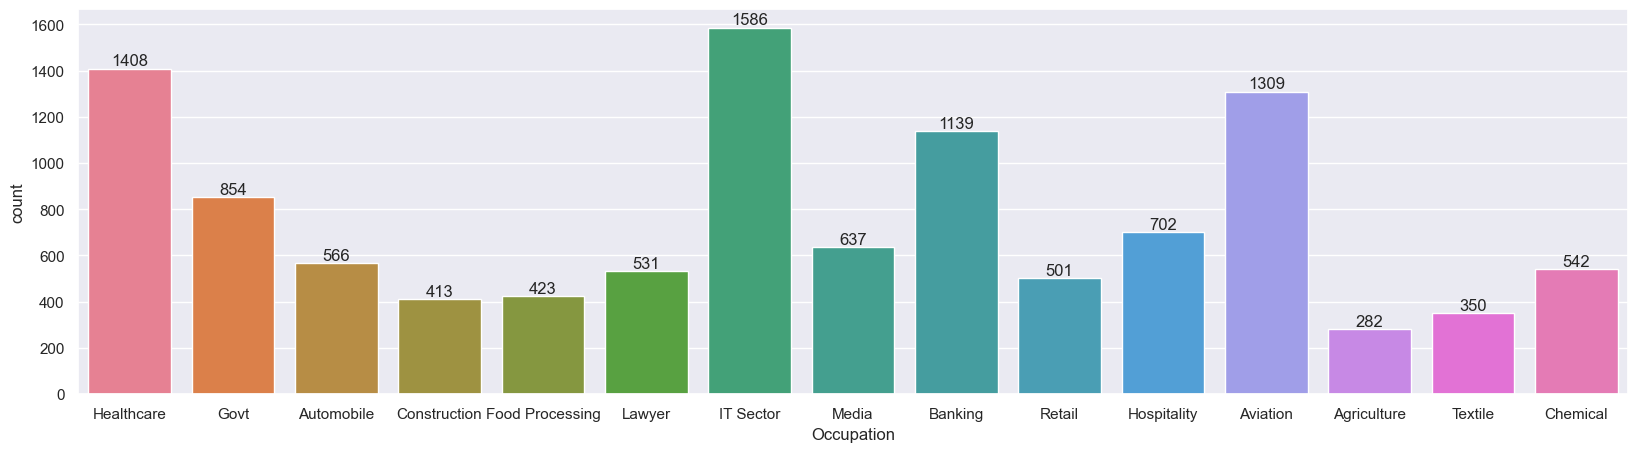

In [285]:
#Now, we can check on the Occupation column effect on the Sales
#getting the count of all sectors of occupation

sbn.set(rc={'figure.figsize': (20,5)})
occ = sbn.countplot(dsd, x = 'Occupation', hue = 'Occupation')
for i in occ.containers:
    occ.bar_label(i)

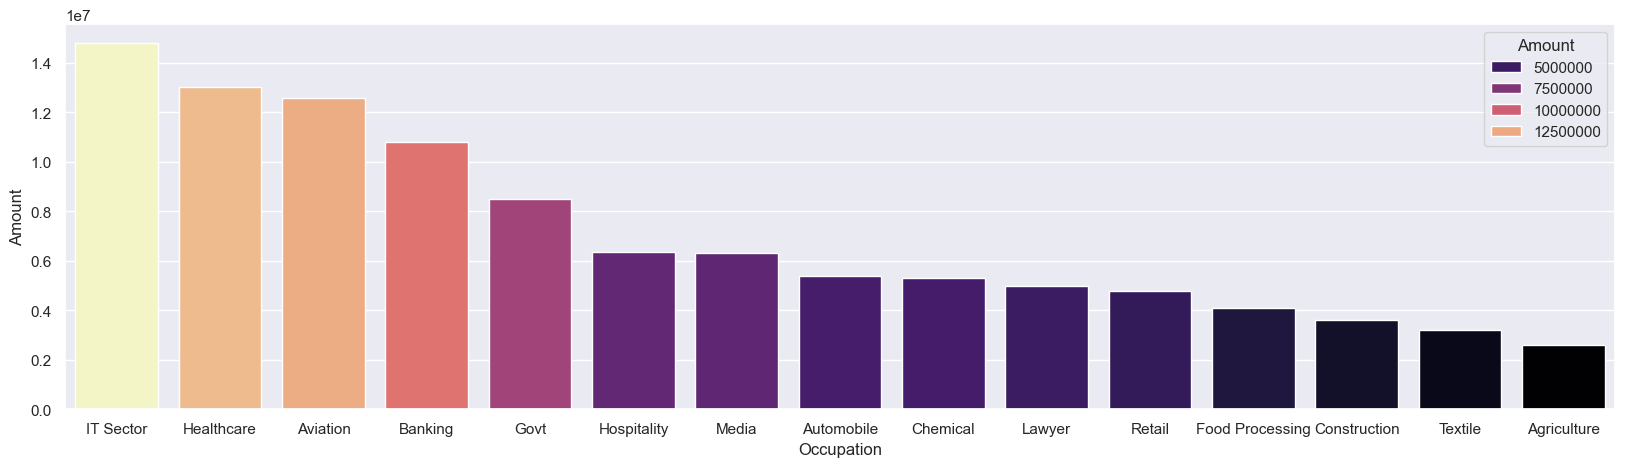

In [291]:
#Comparing Occupation and Amount columns.

occ_amount = dsd.groupby('Occupation', as_index= False)['Amount'].sum().sort_values(by='Amount', ascending = False)
occ_amount_plot = sbn.barplot(occ_amount, x='Occupation', y='Amount', hue='Amount', palette='magma')

<i>From the above analysis of Occupation column, we can draw a conclusion that IT sector is contributing the most for revenue.</i>

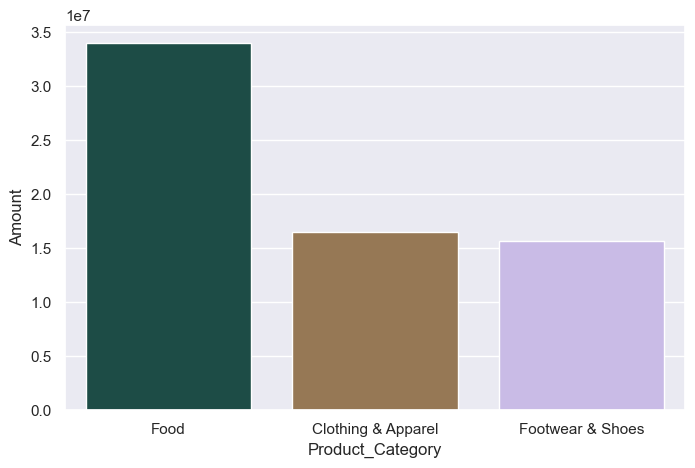

In [301]:
#Last column for the analysis is Product Category.
#Comparing the Product category with Amount and top 3 contributers

prod_amount = dsd.groupby('Product_Category', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending = False).head(3)
sbn.set(rc = {'figure.figsize': (8,5)})
prod_amount_plot = sbn.barplot(prod_amount, x='Product_Category', y='Amount', hue='Product_Category', palette='cubehelix')

<i>From the above analysis of Product Category column, we can draw a conclusion that top 3 categories from which people are buying are Food, Clothing & Apparel and Footwear & Shoes</i>

### <b>Final Conclusion of the Analysis</b>

<i>Female customers aged between 26-35 working in IT Sector are the top buyers of the company, from the most bought products categories Food, Clothing & Apparel and Footwear & Shoes</i>